In [42]:
import matplotlib.pyplot as plt

import sys
sys.path.insert(0, '../fem')
from ManufacturedSolutionsDarcy import *

In [43]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [83]:
N_samples = 10000
d = 2
l_min = 0.5
l_max = 1
dataset = MFSetDarcy(N_samples, d, l_min, l_max)

theta_test = dataset.theta
f_test = dataset.f
etat_test = dataset.etat
etab_test = dataset.etab
gl_test = dataset.gl
gr_test = dataset.gr
u_test = dataset.u

In [84]:
Q = 100
X, Y = np.mgrid[0:1:Q*1j, 0:1:Q*1j]
x = np.vstack([X.ravel(), Y.ravel()]).T

theta = dataset.theta
thetas = []
for i in range(len(theta)):
    thetas.append(theta[i](x))
thetas = np.array(thetas)

In [85]:
np.sum(np.sum(thetas<0, axis=-1)>0)/N_samples

0.0

(array([2543., 2398., 2002., 1435.,  930.,  439.,  178.,   59.,   13.,
           3.]),
 array([3.07338110e-05, 1.10703846e-01, 2.21376959e-01, 3.32050071e-01,
        4.42723183e-01, 5.53396296e-01, 6.64069408e-01, 7.74742520e-01,
        8.85415633e-01, 9.96088745e-01, 1.10676186e+00]),
 <BarContainer object of 10 artists>)

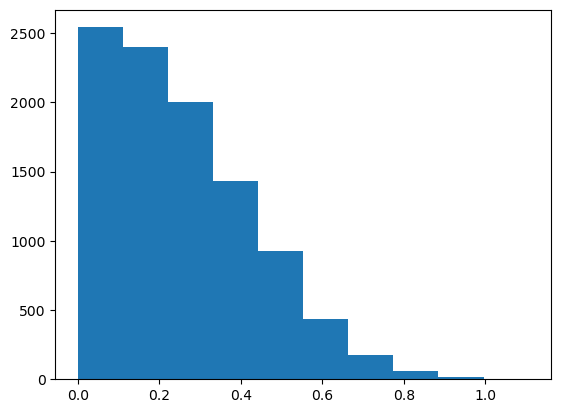

In [86]:
plt.hist(np.amax(thetas,axis=-1) - np.amin(thetas, axis=-1))
# plt.xscale('log')

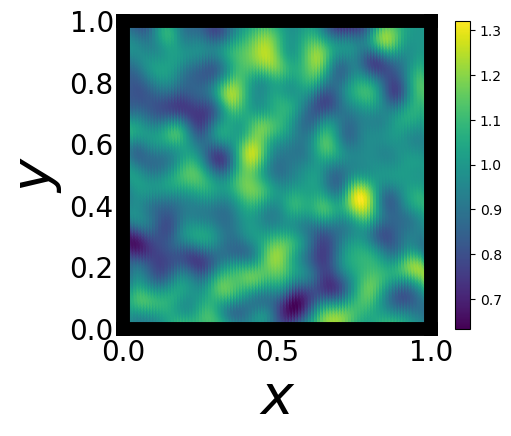

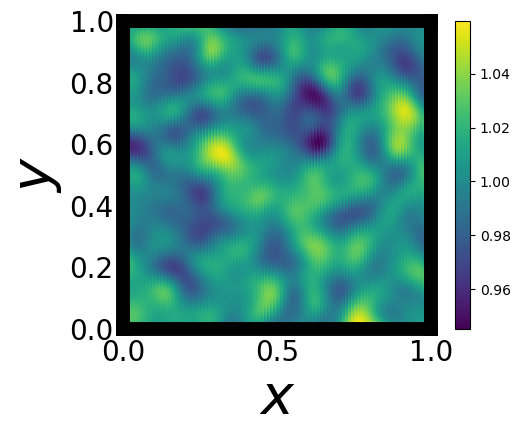

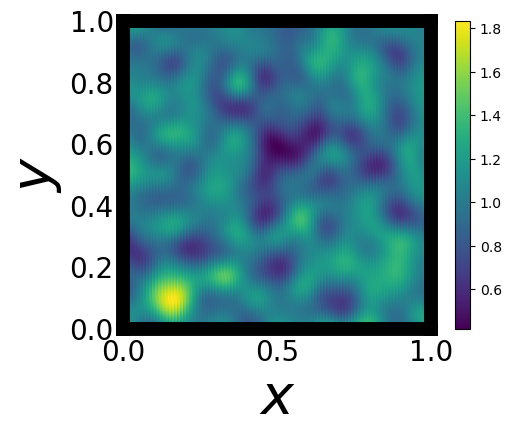

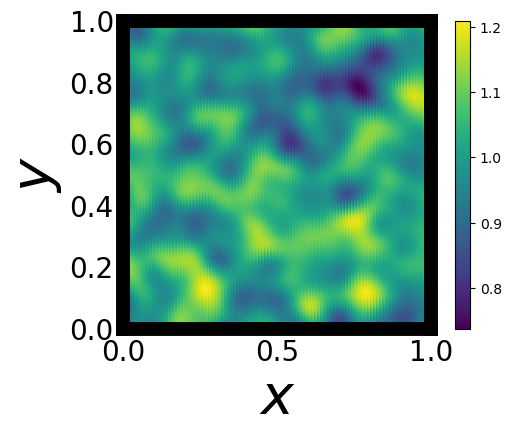

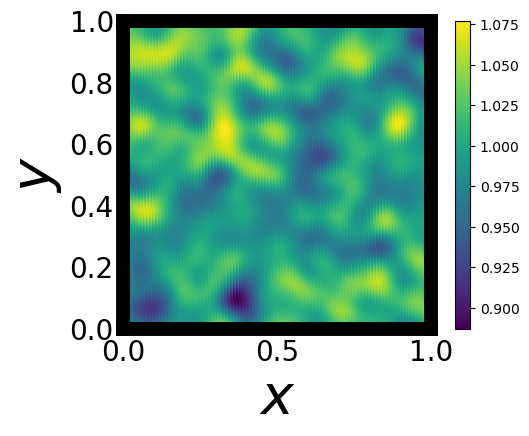

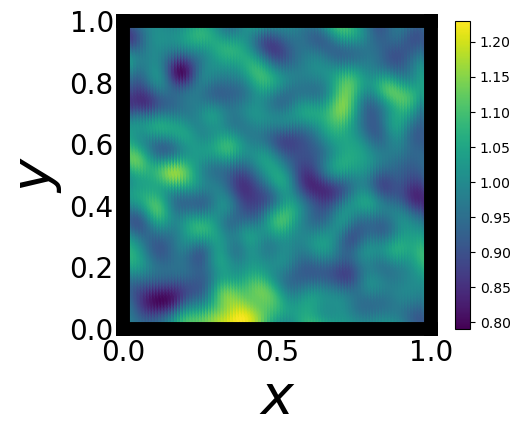

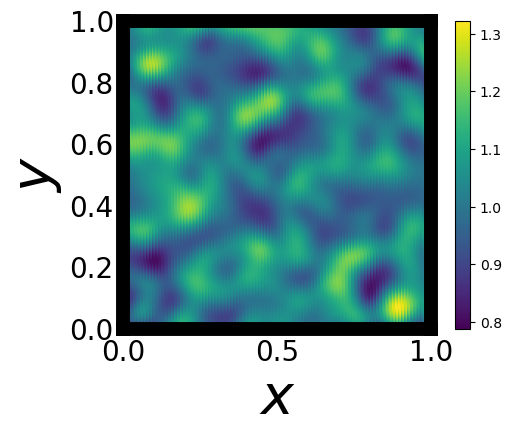

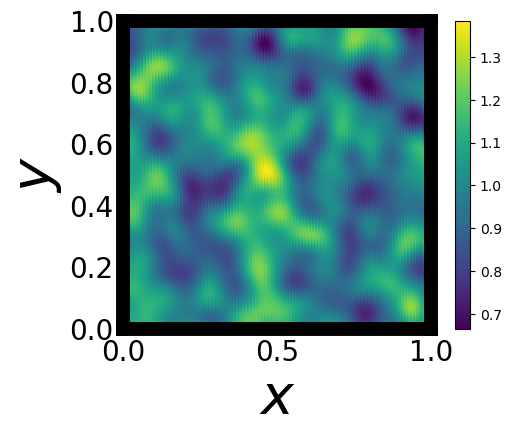

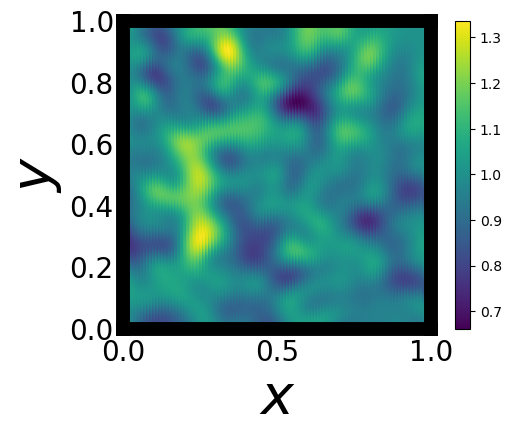

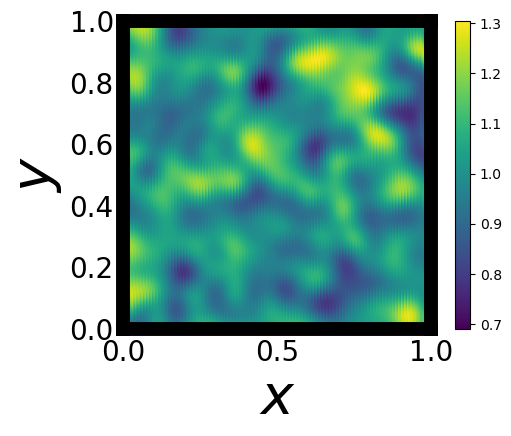

In [66]:
size_ticklabels = 20
size_axeslabels = 40
size_title = 25
box_lw = 10

for i in range(N_samples):

    Q = 100
    X, Y = np.mgrid[0:1:Q*1j, 0:1:Q*1j]
    x = np.vstack([X.ravel(), Y.ravel()]).T
        
    fig, ax = plt.subplots(1,1, figsize=(6, 4))
    fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.4, hspace=0.4)

    # plot0 = ax.tripcolor(x[:,0], x[:,1], theta_test[i](x))
    plot0 = ax.scatter(x[:,0], x[:,1], c=theta_test[i](x), s=250)
    #ax.set_title(r'$\theta(\mathbf{x})$', fontsize=size_title)
    ax.tick_params(axis='both', labelsize=size_ticklabels)
    ax.ticklabel_format(style='sci', scilimits=[-3,3])
    ax.set_xlabel(r'$x$', fontsize=size_axeslabels)
    ax.set_ylabel(r'$y$', fontsize=size_axeslabels)
    ax.set_xlim(0,1)
    ax.set_ylim(0,1)
    ax.set_aspect('equal')
    fig.colorbar(plot0, ax=ax)
    plt.setp(ax.spines.values(), lw=box_lw, color='black', alpha=1)
    plt.show()

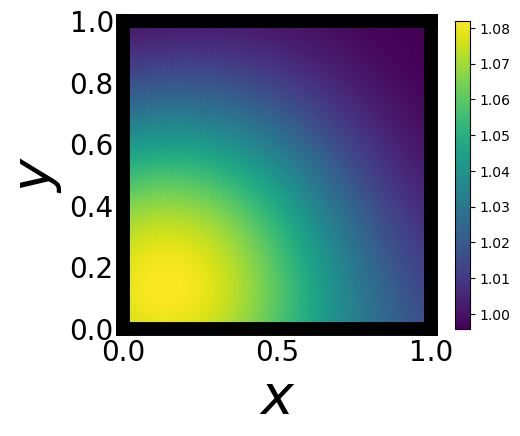

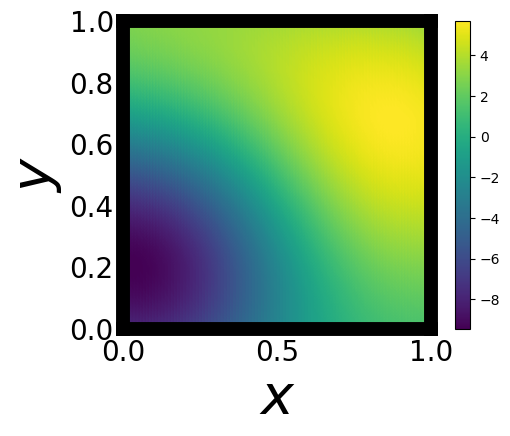

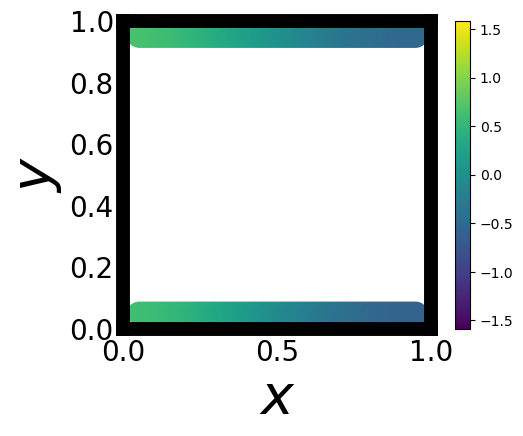

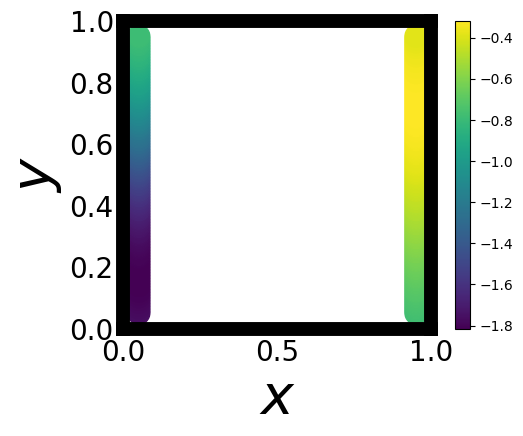

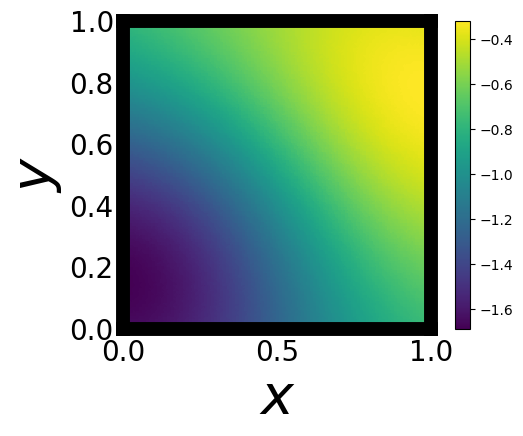

In [131]:
i = 9
size_ticklabels = 20
size_axeslabels = 40
size_title = 25
box_lw = 10

Q = 100
X, Y = np.mgrid[0:1:Q*1j, 0:1:Q*1j]
x = np.vstack([X.ravel(), Y.ravel()]).T
    
fig, ax = plt.subplots(1,1, figsize=(6, 4))
fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.4, hspace=0.4)

# plot0 = ax.tripcolor(x[:,0], x[:,1], theta_test[i](x))
plot0 = ax.scatter(x[:,0], x[:,1], c=theta_test[i](x), s=250)
#ax.set_title(r'$\theta(\mathbf{x})$', fontsize=size_title)
ax.tick_params(axis='both', labelsize=size_ticklabels)
ax.ticklabel_format(style='sci', scilimits=[-3,3])
ax.set_xlabel(r'$x$', fontsize=size_axeslabels)
ax.set_ylabel(r'$y$', fontsize=size_axeslabels)
ax.set_xlim(0,1)
ax.set_ylim(0,1)
ax.set_aspect('equal')
fig.colorbar(plot0, ax=ax)
plt.setp(ax.spines.values(), lw=box_lw, color='black', alpha=1);

# plt.savefig("theta.svg", bbox_inches='tight', transparent=True)


fig, ax = plt.subplots(1,1, figsize=(6, 4))
fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.4, hspace=0.4)

# plot0 = ax.tripcolor(x[:,0], x[:,1], f_test[i](x))
plot0 = ax.scatter(x[:,0], x[:,1], c=f_test[i](x), s=250)
#ax.set_title(r'$f(\mathbf{x})$', fontsize=size_title)
ax.tick_params(axis='both', labelsize=size_ticklabels)
ax.ticklabel_format(style='sci', scilimits=[-3,3])
ax.set_xlabel(r'$x$', fontsize=size_axeslabels)
ax.set_ylabel(r'$y$', fontsize=size_axeslabels)
ax.set_xlim(0,1)
ax.set_ylim(0,1)
ax.set_aspect('equal')
fig.colorbar(plot0, ax=ax)
plt.setp(ax.spines.values(), lw=box_lw, color='black', alpha=1);

# plt.savefig("f.svg", bbox_inches='tight', transparent=True)


fig, ax = plt.subplots(1,1, figsize=(6, 4))
fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.4, hspace=0.4)

vmin = min(np.amin(etab_test[i](x)),np.amin(etat_test[i](x)))
vmax = max(np.amax(etab_test[i](x)),np.amax(etat_test[i](x)))
# fig = ax.scatter(x[x[:,1]==0,0], x[x[:,1]==0,1], c=etab_test[i](x)[x[:,1]==0], label=r'$\eta_\mathrm{bottom}(x)$', s=1000, vmin=vmin, vmax=vmax)
# fig = ax.scatter(x[x[:,1]==1,0], x[x[:,1]==1,1], c=etat_test[i](x)[x[:,1]==1], label=r'$\eta_\mathrm{top}(x)$', s=1000, vmin=vmin, vmax=vmax)
fig = ax.scatter(0.05+0.9*x[x[:,1]==0,0], 0.05+0.9*x[x[:,1]==0,1], c=etab_test[i](x)[x[:,1]==0], label=r'$\eta_\mathrm{bottom}(x)$', s=250, vmin=vmin, vmax=vmax)
fig = ax.scatter(0.05+0.9*x[x[:,1]==1,0], 0.05+0.9*x[x[:,1]==1,1], c=etat_test[i](x)[x[:,1]==1], label=r'$\eta_\mathrm{top}(x)$', s=250, vmin=vmin, vmax=vmax)
#ax.set_title(r'$\eta(\mathbf{x})$', fontsize=size_title)
ax.tick_params(axis='both', labelsize=size_ticklabels)
ax.ticklabel_format(style='sci', scilimits=[-3,3])
ax.set_xlabel(r'$x$', fontsize=size_axeslabels)
ax.set_ylabel(r'$y$', fontsize=size_axeslabels)
ax.set_xlim(0,1)
ax.set_ylim(0,1)
# ax.legend(fontsize=20)
ax.set_box_aspect(1)
plt.colorbar(fig)
# ax.grid()
plt.setp(ax.spines.values(), lw=box_lw, color='black', alpha=1)

# plt.savefig("eta.svg", bbox_inches='tight', transparent=True)

fig, ax = plt.subplots(1,1, figsize=(6, 4))
fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.4, hspace=0.4)

vmin = min(np.amin(gl_test[i](x)),np.amin(gr_test[i](x)))
vmax = max(np.amax(gl_test[i](x)),np.amax(gr_test[i](x)))
# fig = ax.scatter(x[x[:,0]==0,0], x[x[:,0]==0,1], c=gl_test[i](x)[x[:,0]==0], label=r'$\eta_\mathrm{bottom}(x)$', s=1000, vmin=vmin, vmax=vmax)
# fig = ax.scatter(x[x[:,0]==1,0], x[x[:,0]==1,1], c=gr_test[i](x)[x[:,0]==1], label=r'$\eta_\mathrm{top}(x)$', s=1000, vmin=vmin, vmax=vmax)
fig = ax.scatter(0.05+0.9*x[x[:,0]==0,0], 0.05+0.9*x[x[:,0]==0,1], c=gl_test[i](x)[x[:,0]==0], label=r'$\eta_\mathrm{bottom}(x)$', s=250, vmin=vmin, vmax=vmax)
fig = ax.scatter(0.05+0.9*x[x[:,0]==1,0], 0.05+0.9*x[x[:,0]==1,1], c=gr_test[i](x)[x[:,0]==1], label=r'$\eta_\mathrm{top}(x)$', s=250, vmin=vmin, vmax=vmax)
#ax.set_title(r'$g(\mathbf{x})$', fontsize=size_title)
ax.tick_params(axis='both', labelsize=size_ticklabels)
ax.ticklabel_format(style='sci', scilimits=[-3,3])
ax.set_xlabel(r'$x$', fontsize=size_axeslabels)
ax.set_ylabel(r'$y$', fontsize=size_axeslabels)
ax.set_xlim(0,1)
ax.set_ylim(0,1)
# ax.legend(fontsize=20)
ax.set_box_aspect(1)
plt.colorbar(fig)
# ax.grid()
plt.setp(ax.spines.values(), lw=box_lw, color='black', alpha=1)

# plt.savefig("g.svg", bbox_inches='tight', transparent=True)

# fig, ax = plt.subplots(1,1, figsize=(6, 4))
# fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.4, hspace=0.4)

# vmin = min(np.amin(etab_test[i](x)),np.amin(etat_test[i](x)),np.amin(gl_test[i](x)),np.amin(gr_test[i](x)))
# vmax = max(np.amax(etab_test[i](x)),np.amax(etat_test[i](x)),np.amax(gl_test[i](x)),np.amax(gr_test[i](x)))
# fig = ax.scatter(x[x[:,0]==0,0], x[x[:,0]==0,1], c=gl_test[i](x)[x[:,0]==0], label=r'$\eta_\mathrm{bottom}(x)$', s=1000, vmin=vmin, vmax=vmax)
# fig = ax.scatter(x[x[:,0]==1,0], x[x[:,0]==1,1], c=gr_test[i](x)[x[:,0]==1], label=r'$\eta_\mathrm{top}(x)$', s=1000, vmin=vmin, vmax=vmax)
# fig = ax.scatter(x[x[:,1]==0,0], x[x[:,1]==0,1], c=etab_test[i](x)[x[:,1]==0], label=r'$\eta_\mathrm{bottom}(x)$', s=1000, vmin=vmin, vmax=vmax)
# fig = ax.scatter(x[x[:,1]==1,0], x[x[:,1]==1,1], c=etat_test[i](x)[x[:,1]==1], label=r'$\eta_\mathrm{top}(x)$', s=1000, vmin=vmin, vmax=vmax)
# #ax.set_title(r'$\eta(\mathbf{x})$', fontsize=size_title)
# ax.tick_params(axis='both', labelsize=size_ticklabels)
# ax.ticklabel_format(style='sci', scilimits=[-3,3])
# ax.set_xlabel(r'$x$', fontsize=size_axeslabels)
# ax.set_ylabel(r'$y$', fontsize=size_axeslabels)
# ax.set_xlim(0,1)
# ax.set_ylim(0,1)
# # ax.legend(fontsize=20)
# ax.set_box_aspect(1)
# plt.colorbar(fig)
# # ax.grid()
# plt.setp(ax.spines.values(), lw=box_lw, color='black', alpha=1)

# plt.savefig("vecg.svg", bbox_inches='tight', transparent=True)


fig, ax = plt.subplots(1,1, figsize=(6, 4))
fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.4, hspace=0.4)

plot1 = ax.tripcolor(x[:,0], x[:,1], u_test[i](x), vmin=np.amin(u_test[i](x)), vmax=np.amax(u_test[i](x)))
#ax.set_title(r'$u(\mathbf{x})$', fontsize=size_title)
ax.tick_params(axis='both', labelsize=size_ticklabels)
ax.ticklabel_format(style='sci', scilimits=[-3,3])
ax.set_xlabel(r'$x$', fontsize=size_axeslabels)
ax.set_ylabel(r'$y$', fontsize=size_axeslabels)
ax.set_xlim(0,1)
ax.set_ylim(0,1)
ax.set_aspect('equal')
fig.colorbar(plot1, ax=ax)
plt.setp(ax.spines.values(), lw=box_lw, color='black', alpha=1);

# plt.savefig("u.svg", bbox_inches='tight', transparent=True)